<a href="https://colab.research.google.com/github/YoungJae20213137/24_Lab1_1/blob/main/MNIST2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.16MB/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100])
Net(
  (features): Sequential(
    (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU(inplace=True)
    (5): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU(inplace=True)
    (12): BatchNorm2d(40, eps=1e-05,

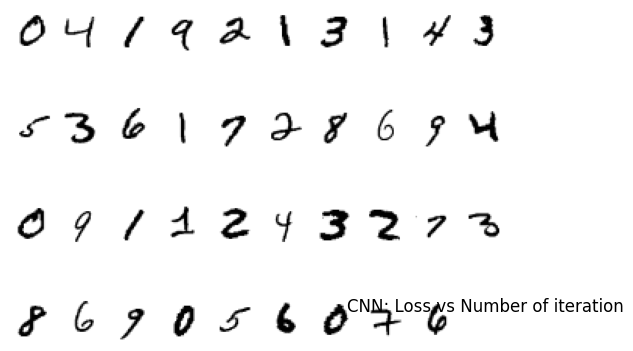

<function matplotlib.pyplot.show(close=None, block=None)>

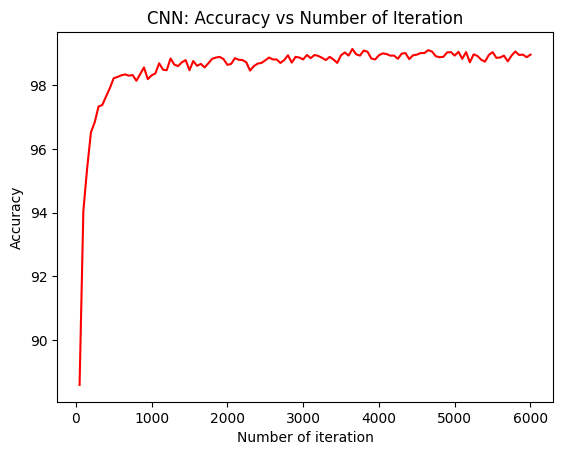

In [1]:
# https://towardsdatascience.com/start-your-cnn-journey-with-pytorch-in-python-6f8364a79801
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

# data preparation
# Transform the data to torch tensors and normalize it
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(
                                    (0.5, ), (0.5, ))])

# Prepare training set and testing set
trainset = torchvision.datasets.MNIST('mnist', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False,
                                     download=True, transform=transform)

# Prepare training loader and testing loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=0)

print(trainset.data.shape)
print(testset.data.shape)

data_iter = iter(train_loader)
images, labels = next(data_iter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 40
for index in range(1, num_of_images + 1):
    plt.subplot(4, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')

# preparing the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, stride=1, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, stride=1, padding=1),
                                      nn.MaxPool2d(2, 2),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(10),
                                      nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(20),
                                      nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, stride=1, padding=1),
                                      nn.MaxPool2d(2, 2),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(40))

        # Declare all the layers for classification
        self.classifier = nn.Sequential(nn.Linear(7 * 7 * 40, 200),
                                        nn.ReLU(inplace=True),
                                        nn.Dropout(p=0.5),
                                        nn.Linear(200, 500),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(500, 10))

    def forward(self, x):

        # Apply the feature extractor in the input
        x = self.features(x)

        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)

        # Classify the images
        x = self.classifier(x)
        return x

# print model architecture
model = Net()
print(model)

# Loss criteria and optimizer
# Instantiate the network
model = Net()

# Instantiate the cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.001)

# Model training
# batch_size, epoch and iteration
batch_size = 100
features_train = trainset.data.shape[0]
n_iters = 6000

num_epochs = n_iters/(features_train/batch_size)

num_epochs = int(num_epochs)
num_epochs

# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        train, labels = data

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate relu and cross entropy loss
        loss = criterion(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update weights
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for i, data in enumerate(test_loader, 0):
                test, labels = data

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss value and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 600 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

# Visualize Loss and Accuracy
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# Visualization accuracy
plt.plot(iteration_list, accuracy_list, color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of Iteration")
plt.show